In [1]:
import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

from datasets import MRSDataset
from torch.utils.data import DataLoader

In [3]:
dataset = MRSDataset(root='../data/', split='train')
all_samples = np.array([dataset[i] for i in range(len(dataset))])
all_samples.shape

(500, 512)

In [4]:
best_aic = np.inf
best_bic = np.inf
best_n_components = 1
aic_values = []
bic_values = []

n_components_range = range(1, 5) 

for n_components in n_components_range:
    print(n_components)
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(all_samples)

    # Calculate AIC and BIC
    aic = gmm.aic(all_samples)
    bic = gmm.bic(all_samples)

    aic_values.append(aic)
    bic_values.append(bic)

    # Keep track of the best AIC and BIC
    if aic < best_aic:
        best_aic = aic
        best_n_components_aic = n_components

    if bic < best_bic:
        best_bic = bic
        best_n_components_bic = n_components

1
2
3
4


Best number of components by AIC: 1
Best number of components by BIC: 1


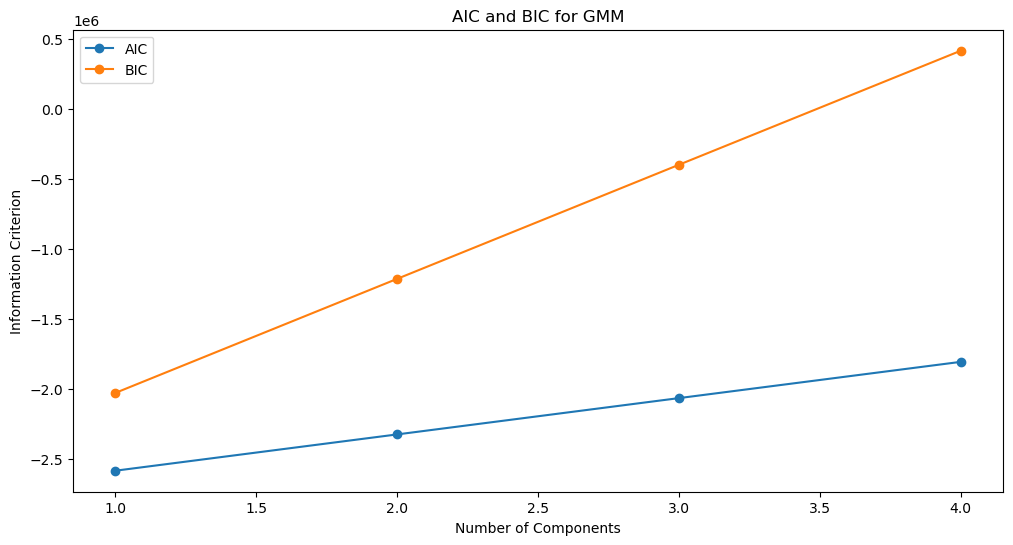

In [5]:
# Print best numbers of components
print(f"Best number of components by AIC: {best_n_components_aic}")
print(f"Best number of components by BIC: {best_n_components_bic}")

# Plot AIC and BIC
plt.figure(figsize=(12, 6))
plt.plot(n_components_range, aic_values, label='AIC', marker='o')
plt.plot(n_components_range, bic_values, label='BIC', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC for GMM')
plt.legend()
plt.show()

In [8]:
best_gmm = GaussianMixture(n_components=1)
best_gmm.fit(all_samples)
generated_samples = best_gmm.sample(10)[0]

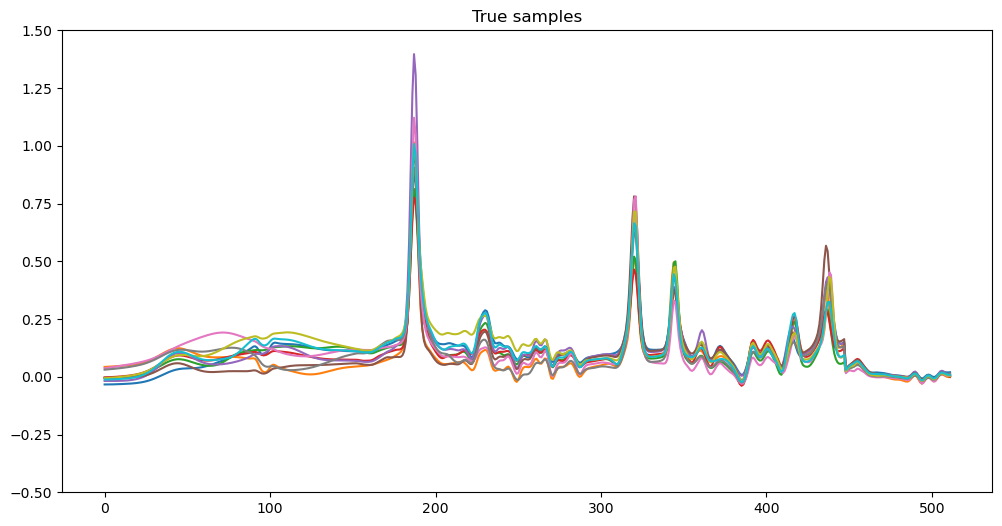

In [6]:
plt.figure(figsize=(12,6))
for i in range(10):
    plt.plot(all_samples[i,:])
plt.title('True samples')
plt.ylim(-0.5, 1.5)
plt.show()

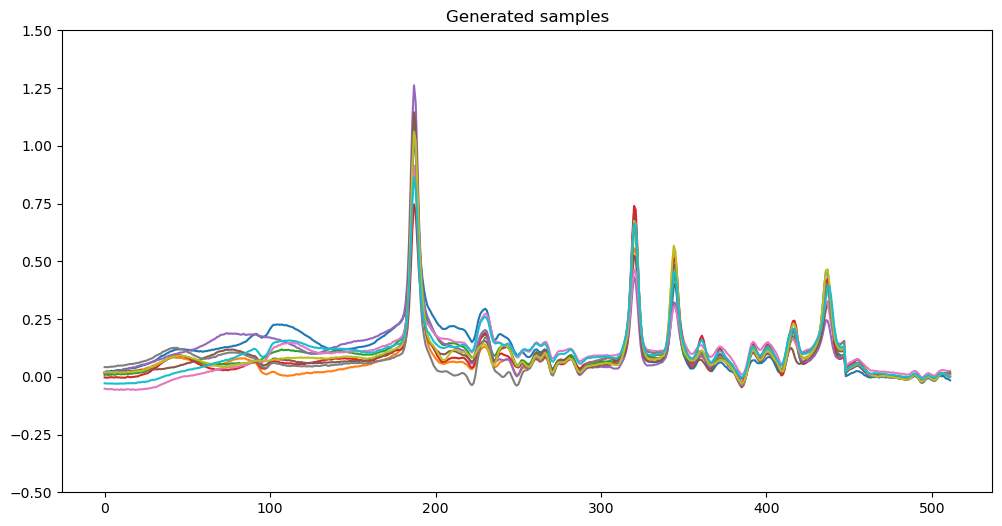

In [9]:
plt.figure(figsize=(12,6))
for i in range(10):
    plt.plot(generated_samples[i,:])
plt.title('Generated samples')
plt.ylim(-0.5, 1.5)
plt.show()